In [81]:
from sklearn.preprocessing import StandardScaler as SS
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates
%matplotlib inline

In [82]:
data=pd.read_csv("C:\\Users\\Abhinav Raj\\Downloads\\Data sets\\weather\\minute_weather.csv")

In [83]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [84]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [85]:
data.shape

(1587257, 13)

In [86]:
sampled_df = data[(data.rowID%10) == 0]
sampled_df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4


In [87]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [88]:
sampled_df[sampled_df.rain_duration==0].shape

(157237, 13)

In [89]:
sampled_df[sampled_df.rain_accumulation==0].shape

(157812, 13)

In [90]:
del sampled_df["rain_accumulation"]
del sampled_df["rain_duration"]

In [91]:
rows_before=sampled_df.shape[0]
sampled_df=sampled_df.dropna()
rows_after=sampled_df.shape[0]

In [92]:
rows_before-rows_after

46

In [93]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [94]:
features=['air_pressure','air_temp','avg_wind_direction', 'avg_wind_speed','max_wind_speed','max_wind_direction',"relative_humidity"]

In [95]:
selected_df=sampled_df[features]

In [96]:
selected_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_speed', 'max_wind_direction', 'relative_humidity'],
      dtype='object')

In [97]:
selected_df.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_speed,max_wind_direction,relative_humidity
0,912.3,64.76,97.0,1.2,1.6,106.0,60.5
10,912.3,62.24,144.0,1.2,1.8,167.0,38.5
20,912.2,63.32,100.0,2.0,2.5,122.0,58.3
30,912.2,62.60,91.0,2.0,2.4,103.0,57.9
40,912.2,64.04,81.0,2.6,2.9,88.0,57.4


In [98]:
x=SS().fit_transform(selected_df)
x[0]

array([-1.48456281,  0.24544455, -0.68385323, -0.76555283, -0.74440309,
       -0.62153592,  0.49233835])

In [99]:
kmeans=KMeans(n_clusters=12)
model=kmeans.fit(x)
print("model\n",model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [100]:
centers=model.cluster_centers_
centers

array([[ 0.25080285, -0.99451294,  0.65944898, -0.54729068, -0.52997325,
         0.85077813,  1.15881217],
       [-0.16278796,  0.86350303, -1.31110135, -0.58976781, -0.60507959,
        -1.16678812, -0.64182083],
       [-1.18030918, -0.87598404,  0.4469324 ,  1.97717811,  1.93845368,
         0.53881323,  0.9141619 ],
       [ 1.36754714, -0.08185973, -1.20715517, -0.04804462, -0.0276889 ,
        -1.0761107 , -0.97749559],
       [ 0.05909963, -0.78728498, -1.19635119, -0.57103421, -0.58554363,
        -1.0422014 ,  0.87708859],
       [-0.84003502, -1.19842374,  0.37505433,  0.35637632,  0.34433733,
         0.47352231,  1.36221325],
       [ 1.1903932 , -0.25532324, -1.15504338,  2.12500582,  2.24217458,
        -1.05345307, -1.13430643],
       [ 0.2339313 ,  0.31909585,  1.88794143, -0.65198177, -0.57681439,
        -1.55164369, -0.28251551],
       [ 0.13183584,  0.84391115,  1.41067442, -0.63848742, -0.58921925,
         1.67473736, -0.71396362],
       [-0.69317583,  0.5479

In [101]:
def pd_centers(featuresUsed,centers):
    colNames =list(featuresUsed)
    colNames.append("prediction")
    z= [np.append(A,index) for index, A in enumerate(centers)]
    P=pd.DataFrame(z,columns=colNames)
    P["prediction"]=P["prediction"].astype(int)
    return P

In [108]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_speed,max_wind_direction,relative_humidity,prediction
0,0.250803,-0.994513,0.659449,-0.547291,-0.529973,0.850778,1.158812,0
1,-0.162788,0.863503,-1.311101,-0.589768,-0.605080,-1.166788,-0.641821,1
2,-1.180309,-0.875984,0.446932,1.977178,1.938454,0.538813,0.914162,2
3,1.367547,-0.081860,-1.207155,-0.048045,-0.027689,-1.076111,-0.977496,3
4,0.059100,-0.787285,-1.196351,-0.571034,-0.585544,-1.042201,0.877089,4
5,-0.840035,-1.198424,0.375054,0.356376,0.344337,0.473522,1.362213,5
6,1.190393,-0.255323,-1.155043,2.125006,2.242175,-1.053453,-1.134306,6
7,0.233931,0.319096,1.887941,-0.651982,-0.576814,-1.551644,-0.282516,7
8,0.131836,0.843911,1.410674,-0.638487,-0.589219,1.674737,-0.713964,8
9,-0.693176,0.547971,0.178670,-0.583754,-0.597138,0.348016,-0.117109,9


In [109]:
P[P["relative_humidity"]< -0.5]

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_speed,max_wind_direction,relative_humidity,prediction
1,-0.162788,0.863503,-1.311101,-0.589768,-0.605080,-1.166788,-0.641821,1
3,1.367547,-0.081860,-1.207155,-0.048045,-0.027689,-1.076111,-0.977496,3
6,1.190393,-0.255323,-1.155043,2.125006,2.242175,-1.053453,-1.134306,6
8,0.131836,0.843911,1.410674,-0.638487,-0.589219,1.674737,-0.713964,8
11,0.733676,0.431508,0.285493,-0.533860,-0.540082,0.473182,-0.772639,11


In [113]:
def parallel_plot(data):
    my_colors= list(islice(cycle(['b','r','g','y','k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

C:\Users\Abhinav Raj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  after removing the cwd from sys.path.


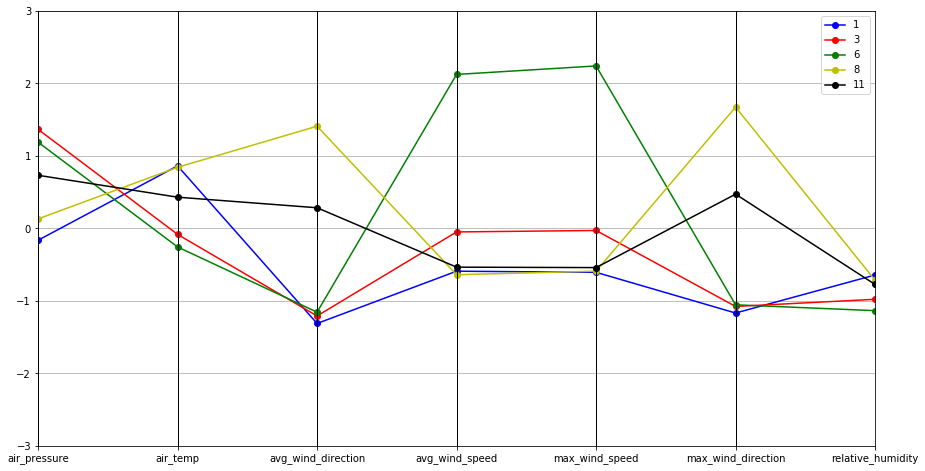

In [115]:
parallel_plot(P[P["relative_humidity"]< -0.5])

C:\Users\Abhinav Raj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  after removing the cwd from sys.path.


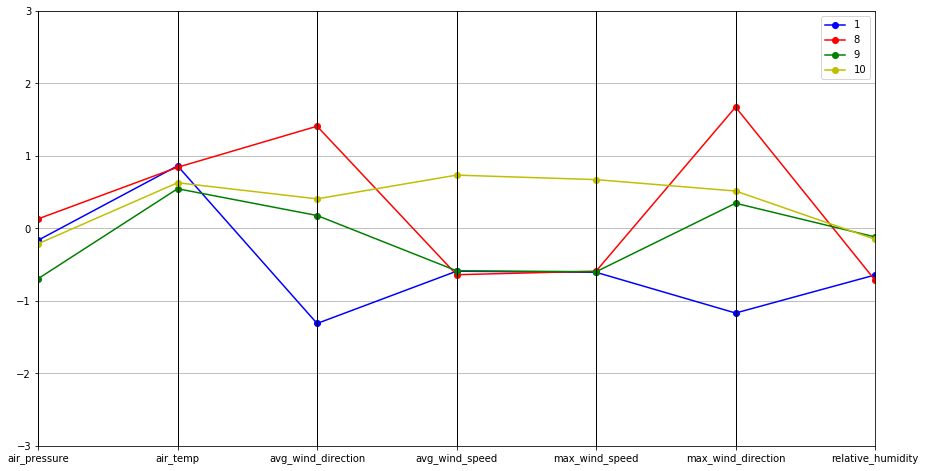

In [118]:
parallel_plot(P[P["air_temp"]>0.5])

In [120]:
P[(P["relative_humidity"]>0.5) & (P["air_temp"]<0.5)]

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_speed,max_wind_direction,relative_humidity,prediction
0,0.250803,-0.994513,0.659449,-0.547291,-0.529973,0.850778,1.158812,0
2,-1.180309,-0.875984,0.446932,1.977178,1.938454,0.538813,0.914162,2
4,0.059100,-0.787285,-1.196351,-0.571034,-0.585544,-1.042201,0.877089,4
5,-0.840035,-1.198424,0.375054,0.356376,0.344337,0.473522,1.362213,5


C:\Users\Abhinav Raj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  after removing the cwd from sys.path.


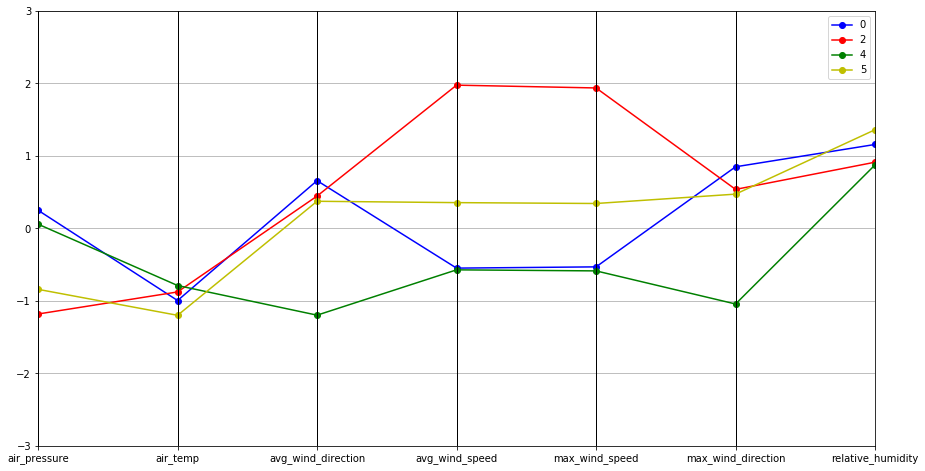

In [121]:
parallel_plot(P[(P["relative_humidity"]>0.5) & (P["air_temp"]<0.5)])